<a href="https://colab.research.google.com/github/oluwoleowoeye/food-price-analysis/blob/main/Visualization_and_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import os

folder_path = "food_anomalies"
os.makedirs(folder_path, exist_ok=True)

print(f"Folder '{folder_path}' created.")


Folder 'food_anomalies' created.


In [2]:
from google.colab import files

uploaded = files.upload()


Saving 2.c.1_food prices anomalies indicator.xlsx to 2.c.1_food prices anomalies indicator.xlsx


In [5]:
import shutil

filename = list(uploaded.keys())[0]  # get uploaded file name
shutil.move(filename, f"{folder_path}/{filename}")

print(f"✅ File moved to: {folder_path}/{filename}")


✅ File moved to: food_anomalies/2.c.1_food prices anomalies indicator.xlsx


In [6]:
import pandas as pd

# Define the file path
file_path = f"{folder_path}/{filename}"

# Check available sheets
xls = pd.ExcelFile(file_path)
print("📄 Sheets:", xls.sheet_names)


📄 Sheets: ['Goal2']


In [7]:
# Load the sheet with actual data
df = pd.read_excel(xls, sheet_name="Goal2")

# Show first few rows
df.head()


,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,BasePeriod,Source,GeoInfoUrl,FootNote,Nature,Observation Status,Reporting Type,Severity of price levels,Type of product,Units
0,2,2.c,2.c.1,AG_FPA_CFPI,"Indicator of Food Price Anomalies (IFPA), by C...",4,Afghanistan,2010,-0.12,2010,...,NaN,FAOSTAT Data/ Consumer Price Indices: http://w...,NaN,Abnormally high defined as IFPA>=1. Moderately...,G,A,G,NaN,NaN,INDEX
1,2,2.c,2.c.1,AG_FPA_CFPI,"Indicator of Food Price Anomalies (IFPA), by C...",4,Afghanistan,2011,-0.17,2011,...,NaN,FAOSTAT Data/ Consumer Price Indices: http://w...,NaN,Abnormally high defined as IFPA>=1. Moderately...,G,A,G,NaN,NaN,INDEX
2,2,2.c,2.c.1,AG_FPA_CFPI,"Indicator of Food Price Anomalies (IFPA), by C...",4,Afghanistan,2012,-0.28,2012,...,NaN,FAOSTAT Data/ Consumer Price Indices: http://w...,NaN,Abnormally high defined as IFPA>=1. Moderately...,G,A,G,NaN,NaN,INDEX
3,2,2.c,2.c.1,AG_FPA_CFPI,"Indicator of Food Price Anomalies (IFPA), by C...",4,Afghanistan,2013,0.30,2013,...,NaN,FAOSTAT Data/ Consumer Price Indices: http://w...,NaN,Abnormally high defined as IFPA>=1. Moderately...,G,A,G,NaN,NaN,INDEX
4,2,2.c,2.c.1,AG_FPA_CFPI,"Indicator of Food Price Anomalies (IFPA), by C...",4,Afghanistan,2014,0.42,2014,...,NaN,FAOSTAT Data/ Consumer Price Indices: http://w...,NaN,Abnormally high defined as IFPA>=1. Moderately...,G,A,G,NaN,NaN,INDEX


In [8]:
# Rename and filter required columns
df = df.rename(columns={
    'GeoAreaName': 'Country',
    'TimePeriod': 'Year',
    'Value': 'IFPA',  # Index of Food Price Anomalies
    'Type of product': 'Product'
})

# Select necessary columns
df = df[['Country', 'Year', 'IFPA', 'Product']]

# Drop missing values
df = df.dropna(subset=['IFPA'])


In [9]:
# Filter for Kenya
kenya_df = df[df['Country'] == 'Kenya'].sort_values(by='Year')

kenya_df.head()


,Country,Year,IFPA,Product
1316,Kenya,2010,-0.28,NaN
1317,Kenya,2011,1.36,NaN
1318,Kenya,2012,-1.50,NaN
1319,Kenya,2013,-0.39,NaN
1320,Kenya,2014,-0.32,NaN


/tmp/ipython-input-10-4183291288.py:13: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


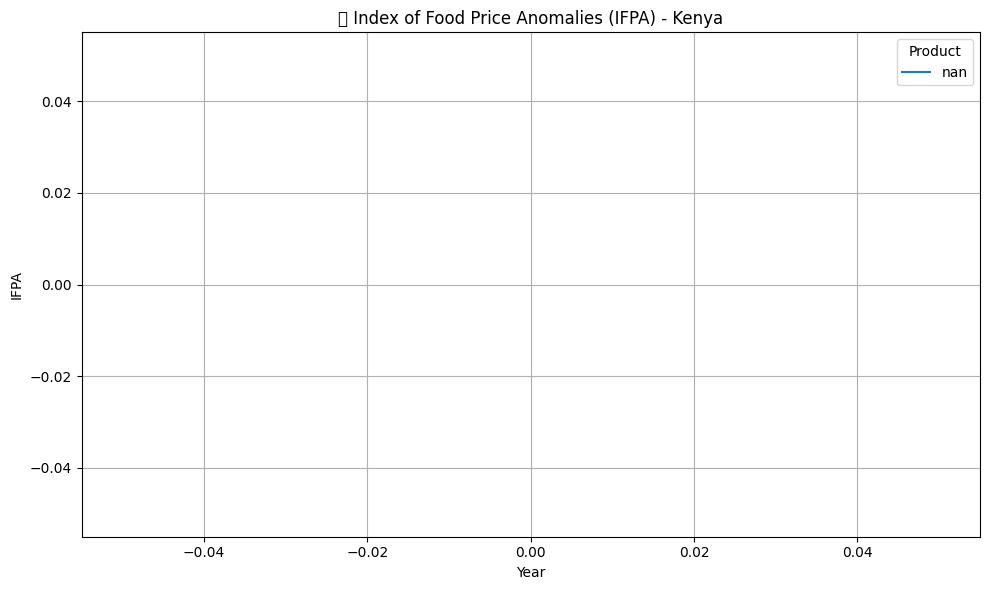

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for product in kenya_df['Product'].unique():
    sub_df = kenya_df[kenya_df['Product'] == product]
    plt.plot(sub_df['Year'], sub_df['IFPA'], label=product)

plt.title("📈 Index of Food Price Anomalies (IFPA) - Kenya")
plt.xlabel("Year")
plt.ylabel("IFPA")
plt.legend(title="Product")
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd

# Optional: make a copy to avoid modifying original
df_viz = df.copy()

# Rename columns for simplicity
df_viz = df_viz.rename(columns={
    "GeoAreaName": "Country",
    "TimePeriod": "Year",
    "Value": "IFPA",
    "Type of product": "Product"
})


In [16]:
# Keep only rows with IFPA values
df_viz = df_viz.dropna(subset=["IFPA"])

# Convert IFPA to numeric if not already
df_viz["IFPA"] = pd.to_numeric(df_viz["IFPA"], errors='coerce')


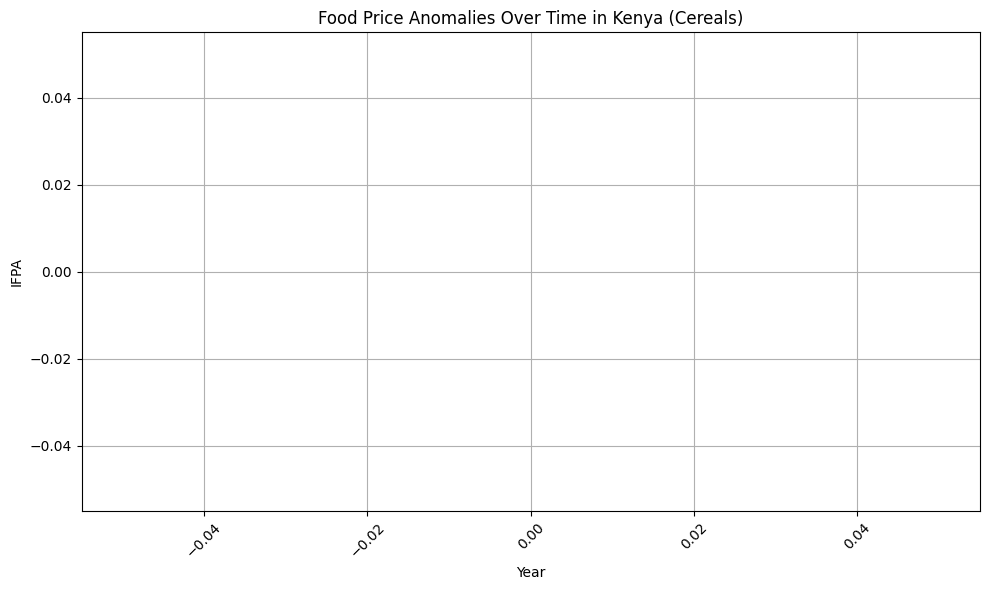

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: visualize for Kenya
country = "Kenya"
product = "Cereals"  # change this to any product you like

df_country = df_viz[(df_viz["Country"] == country) & (df_viz["Product"] == product)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_country, x="Year", y="IFPA", marker='o')
plt.title(f"Food Price Anomalies Over Time in {country} ({product})")
plt.ylabel("IFPA")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


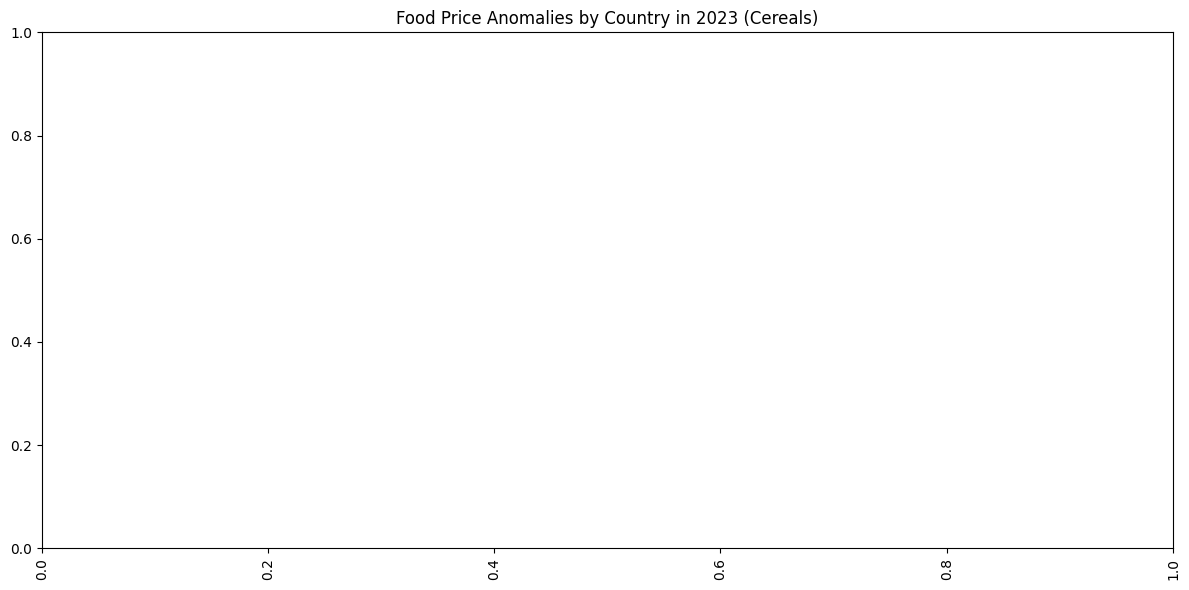

In [18]:
# Compare countries for a specific year and product
year = 2023
product = "Cereals"

df_year = df_viz[(df_viz["Year"] == year) & (df_viz["Product"] == product)]

plt.figure(figsize=(12, 6))
sns.barplot(data=df_year, x="Country", y="IFPA")
plt.xticks(rotation=90)
plt.title(f"Food Price Anomalies by Country in {year} ({product})")
plt.tight_layout()
plt.show()


In [19]:
# Flag anomalies
anomalies = df_viz[df_viz["IFPA"] > 1]
print(anomalies[["Country", "Year", "Product", "IFPA"]].sort_values(by="IFPA", ascending=False))


                          Country  Year Product    IFPA
5306             Northern America  2022     NaN  100.00
5304             Northern America  2022     NaN  100.00
5734  Europe and Northern America  2022     NaN   82.60
5619                       Europe  2023     NaN   81.00
5618                       Europe  2022     NaN   81.00
...                           ...   ...     ...     ...
4247                        Nepal  2021     RIC    1.02
290                      Botswana  2020     NaN    1.01
4138                       Mexico  2022     MAZ    1.01
4533                Guinea-Bissau  2024     RIC    1.01
803                          Fiji  2015     NaN    1.01

[1092 rows x 4 columns]
